<a href="https://colab.research.google.com/github/tejaswaroop2310/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import the dataset 

In [3]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#load the data
data=pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv",encoding= 'unicode_escape')

In [5]:
#first five records of the data set
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
#Last five records of the dataset
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Step 1 : Exploratory Data Analysis and Preprocessing

In [7]:
#Shape of the Dataset
print('The DataFrame contains {} record and {} columns '.format(data.shape[0],data.shape[1]))

The DataFrame contains 8760 record and 14 columns 


In [8]:
#check the datatype of the labels
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


##### Here is the statitical description of the features

In [9]:
#Statistical Information of the DataSet
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#####  Verify that there are no missing values

In [10]:
#check the Null values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### We convert as datetime the series 'Date'

In [11]:
#Convert into datetime 
data['Date']=pd.to_datetime(data['Date'],format="%d/%m/%Y")

####   

## Here are the correlations between variables 

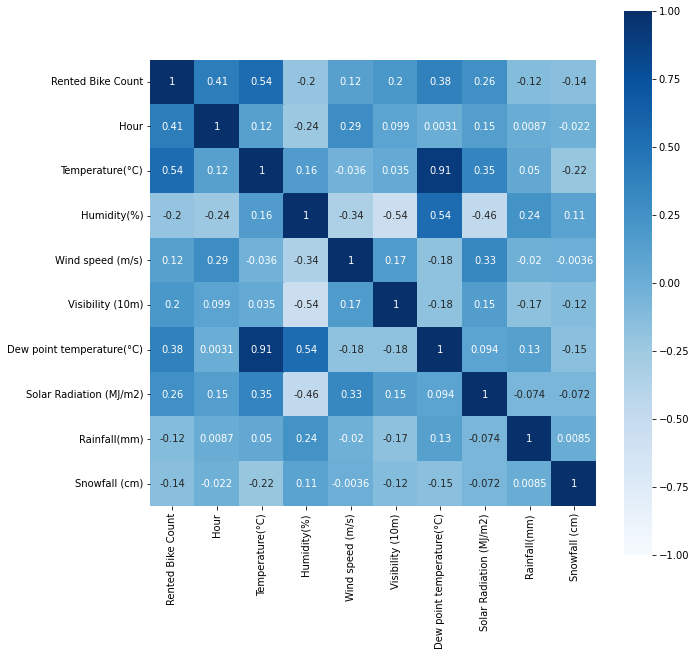

In [12]:
#plot the Correlations between Variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr("pearson"),
            vmin=-1, vmax=1,cmap="Blues",annot=True, 
            square=True);

#### We see that there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)'  so we can drop the column 'Dew point temperature(°C)'. And they have the same variations.

In [13]:
#Drop the columns
data=data.drop(['Dew point temperature(°C)'],axis=1)

####  

# Step 2 : Data Preparation and data Visualisation using Matplotlib and seaborn

In [14]:
#create a Series That describes if it is day or night
data['label_day_night']=data['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [15]:
#Column give the day of the week
data['WeekDay']=data["Date"].dt.day_name() 


In [16]:
#Column gives the month of the date
data['Month']=data['Date'].dt.month_name()

In [17]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December


## Plotting variables to the target 

#### On this plot, we see a high demand  from april  for bike 

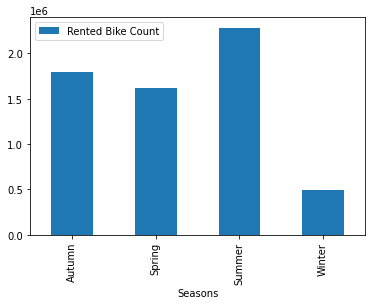

In [18]:
#plt the barplot between Season vs Rented Bike Count
dataSeasons=pd.DataFrame(data.groupby('Seasons').sum()['Rented Bike Count']).plot(kind='bar')

###### We can see that as we expected, summer is the season in which we have the more demand

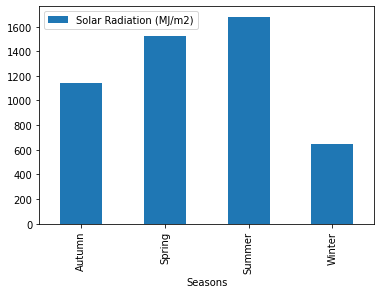

In [19]:
#plot the bar graph for season vs solar Radiatin
dataSolarRadiation=pd.DataFrame(data.groupby('Seasons').sum()['Solar Radiation (MJ/m2)']).plot(kind='bar')

This plot explains the high correlation with the feature 'solar Radiation' and 'Summer'

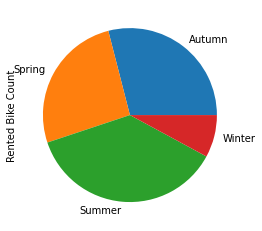

In [20]:
#plot the pie plot for the season and Rented Bike Count
data.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

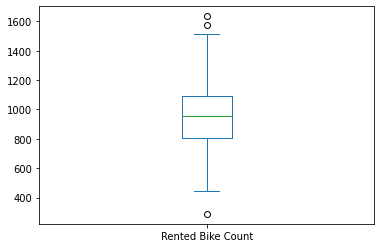

In [21]:
#plot the box plot between solar radiation and rented bike count
data.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot(kind='box')

#### Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

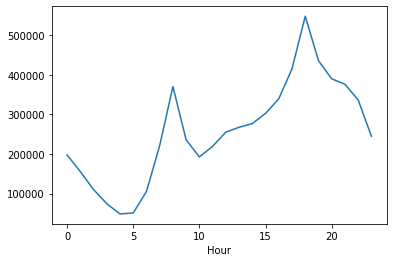

In [22]:
#plot the line plot for hours and Rented Bike count
data.groupby('Hour').sum()['Rented Bike Count'].plot()

#### Here we have a repartition of the rents by hour, at the beginning of the day we suppose people go to work and return by bike 

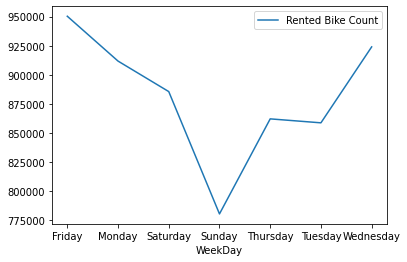

In [23]:
#plot theline plot for Weekday and Rented bike count 
dataDays=pd.DataFrame(data.groupby('WeekDay').sum()['Rented Bike Count']).plot()

#### Days with highest rented bike are week days


####  

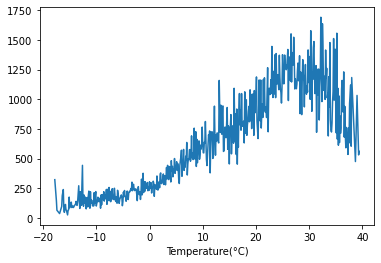

In [24]:
#line plot graph between temperature and Rented Bike count
data.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

####  people like to ride bikes when it is pretty hot around 25°C in average

##### Let's see the repartition of the rents follonwing the moment of the day

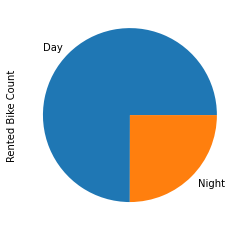

In [25]:
#pie plot graph between label_day_night and Rented Bike count
data.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

#### According to this boxplot there are much more rents during the day than the night 
As the median for the day is around 600 and the median for the night is around 350

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


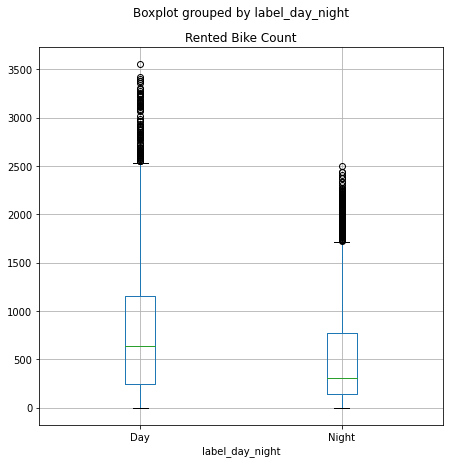

In [26]:
#Boxplot between day and night vs Rented Bike count
boxplotDay_night= data.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))



#### Let's do a visualisation during the holidays


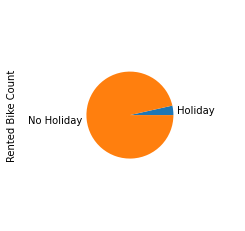

In [27]:
#pieplot between holidays vs Rented bike count
data.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=0.5)


#### We see that holiday rent are very low so let's see on which period extends holidays
it means that there are only 18 days of holidays which is very short. And that explains why the proportion of rents during holiday is low. So we understand that this column is not that important

# Step 3 : Modeling


#### Let's import libraires needed in this modeling part

In [28]:

#importing libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


In [29]:
temp=data.copy()

In [30]:
status = pd.get_dummies(temp['Seasons'], drop_first=True)
status1 = pd.get_dummies(temp['Holiday'], drop_first=True)
status2 = pd.get_dummies(temp['Functioning Day'], drop_first=True)
status3 = pd.get_dummies(temp['WeekDay'], drop_first=True)
#status4 = pd.get_dummies(temp['Month'], drop_first=True)
status5 = pd.get_dummies(temp['label_day_night'], drop_first=True)

In [31]:
temp=pd.concat([temp,status,status1, status2, status3, status5], axis =1)

In [32]:
temp.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month,Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Night
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1


In [33]:
from sklearn.preprocessing import MinMaxScaler
num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]
scaler = MinMaxScaler()
temp[num_vars] = scaler.fit_transform(temp[num_vars])
temp.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month,Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Night
0,2017-12-01,0.071429,0.000000,0.220280,0.377551,0.297297,1.0,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1
1,2017-12-01,0.057368,0.043478,0.215035,0.387755,0.108108,1.0,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1
2,2017-12-01,0.048650,0.086957,0.206294,0.397959,0.135135,1.0,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1
3,2017-12-01,0.030090,0.130435,0.202797,0.408163,0.121622,1.0,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1
4,2017-12-01,0.021935,0.173913,0.206294,0.367347,0.310811,1.0,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,December,0,0,1,1,1,0,0,0,0,0,0,1


In [34]:
#Create an dictionary to report results
reporting={}

In [35]:
#Dropping the some variables
X_MultipleLinearRegression=temp.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay',"Month"],axis =1)
y=temp.iloc[:,1] #the target


In [36]:
#split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X_MultipleLinearRegression,y,test_size=0.27)

## Linear Regression 

In [37]:

#train and predict the testing data with linear regression model 
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

After fitting the model, we print the score between predictions and test targets

In [38]:
#Evaluating the scores
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.5539682739013183 and the train root mean square is: 0.12094613496928795
Linear model, R2 test score is : 0.5780645313707398 and the test root mean square is: 0.11828624457059882


In [39]:
#Storing the result data for regression model 
reporting['Linear regression']=test_set_r2

## Decision Tree Regressor
We first need to standartize data

In [49]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,y_test)

In [50]:
#predicting the scores
print('The best Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))

The best Decision Tree R2 score is : 0.84 with max depth = 15.00 
 
The best R2 test score is : 0.88
 with max depth = 15.00
 


In [51]:
#storing the result data of Desicion tree
reporting['Decision Tree Regressor']=bestDecisionTree_testScore

#Gradient Boosting Algorithm

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [57]:
gboost= GradientBoostingRegressor()
gb_grid =GridSearchCV(estimator=gboost, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.1s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.3s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.3s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   1.7s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time=   1.6s
[CV] END max_depth=6,

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 120]},
             verbose=2)

In [58]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 120}

In [59]:
gb_boost_with_best_perams= GradientBoostingRegressor(max_depth= 8,min_samples_leaf= 40,min_samples_split = 50,n_estimators = 120)
gb_boost_with_best_perams.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50, n_estimators=120)

In [60]:
gb_boost_with_best_perams.score(X_train,y_train)

0.9644314824663174

In [61]:
#Gredient boost score on test data
gb_boost_with_best_perams.score(X_test,y_test)

0.92454394389546

In [65]:
#storing the result data of Desicion tree
reporting['Gradient Boositng']=gb_boost_with_best_perams.score(X_test,y_test)

# Present all the results of every model in a data frame and plot these in function of the model

In [66]:
#create the dataframe for result scores
data_results=pd.DataFrame()
data_results['model']=reporting.keys()
data_results['Score R2']=reporting.values()

In [67]:
data_results=data_results.set_index('model')

In [68]:
dataModels=pd.DataFrame(data_results['Score R2'].sort_values(ascending=False))
dataModels.style.background_gradient(cmap=sns.light_palette(color='blue',as_cmap=True))

,Score R2
model,
Gradient Boositng,0.924544
Decision Tree Regressor,0.877448
Linear regression,0.578065


###Conclusion




*   we see a high demand  from april  for bike 
*   summer is the season in which we have the more demand
*   the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000
*   there are much more bike sharing during the day than the night
*   Accuray is good for Gradient Boosting Algorithm  followed by the Decision Tree and Linear Regression










 ###  